In [51]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tiktoken
from gpt2_models import GPT2Model
from matplotlib.ticker import MaxNLocator

#### SOURCE: [Raschka, Sebastian. Build a Large Language Model (From Scratch). Simon and Schuster, 2024.](https://www.simonandschuster.com/books/Build-a-Large-Language-Model-From-Scratch/Sebastian-Raschka/9781394200867)

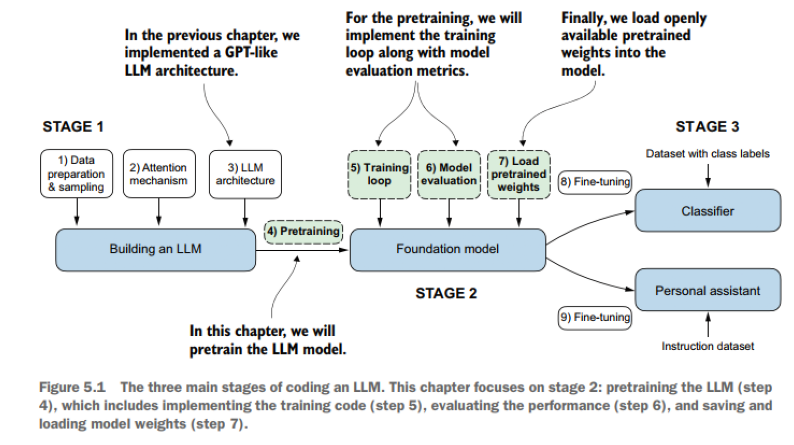

In [2]:
plt.figure(figsize=(10, 14))
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\new.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 768,
    "n_heads": 12,
    "n_layers": 12,
    "drop_rate": 0.1,
    "qkv_bias": False
}

In [4]:
torch.manual_seed(123)
model = GPT2Model(
    vocab_size=GPT_CONFIG_124M['vocab_size'],
    embed_dim=GPT_CONFIG_124M['emb_dim'],
    context_length=GPT_CONFIG_124M['context_length'],
    dropout_rate=GPT_CONFIG_124M['drop_rate'],
    num_layer=GPT_CONFIG_124M['n_layers'],
    num_heads=GPT_CONFIG_124M['n_heads'],
    qkv_bias=GPT_CONFIG_124M['qkv_bias']
)
model.eval()

GPT2Model(
  (token_embed): Embedding(50257, 768)
  (position_embed): Embedding(256, 768)
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer_blocks): Sequential(
    (0): Transformer(
      (attention): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_projection): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (feed_forward): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): Transformer(
      (attention): MultiHeadAttention(


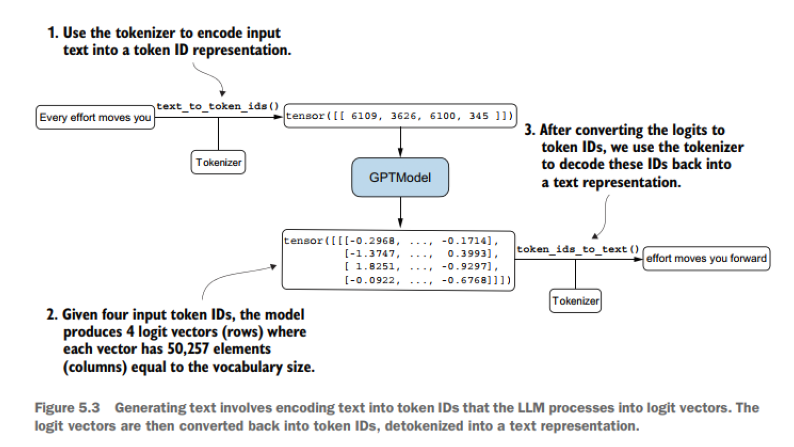

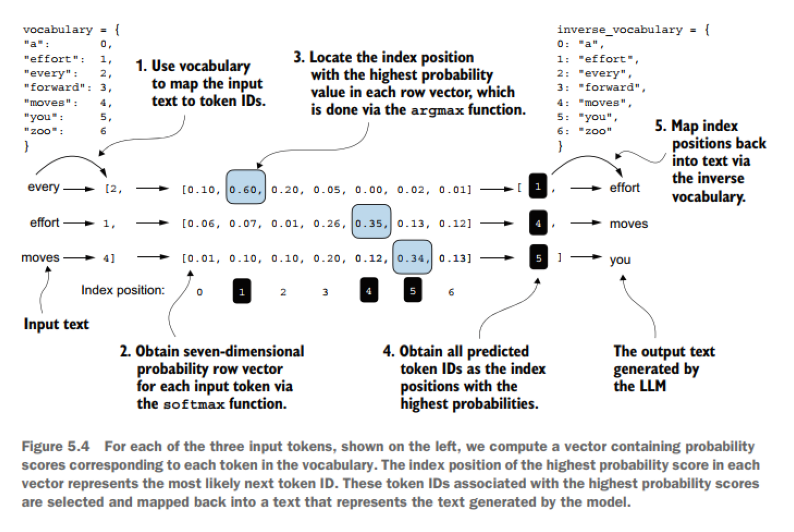

In [5]:
plt.figure(figsize=(10, 14))
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\text.png')
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 14))
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\tt.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]
        probas = torch.softmax(logits, dim=-1)
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)
        idx = torch.cat((idx, idx_next), dim=1)
    return idx

In [7]:
def text_to_token_ids(text, tokenizer):
    
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # .unsqueeze(0) adds the batch dimension
    
    return encoded_tensor

In [8]:
def token_ids_to_text(token_ids, tokenizer):
    
    flat = token_ids.squeeze(0) # Removes batch dimension
    
    return tokenizer.decode(flat.tolist())

In [9]:
start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text=start_context, tokenizer=tokenizer),
    max_new_tokens=20,
    context_size=GPT_CONFIG_124M["context_length"]
)
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren Mortgage TT remember gard ACTIONSussedOND Land Engeledded


### Text Generation Loss (Cross entropy loss)

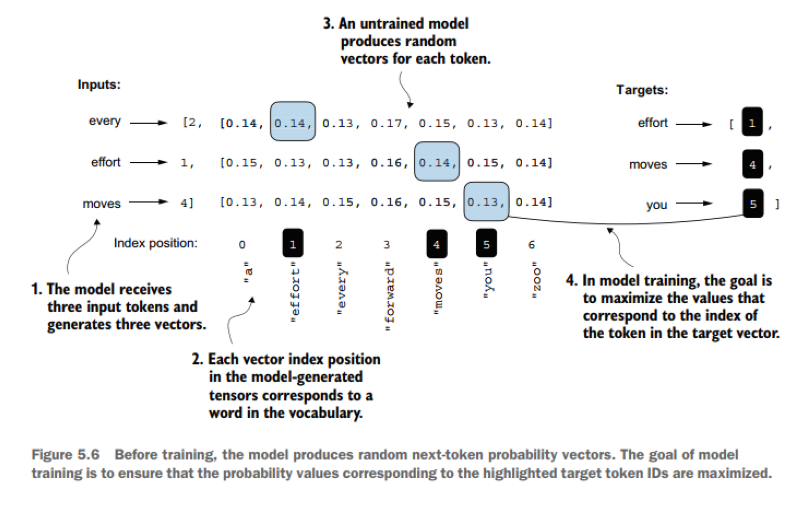

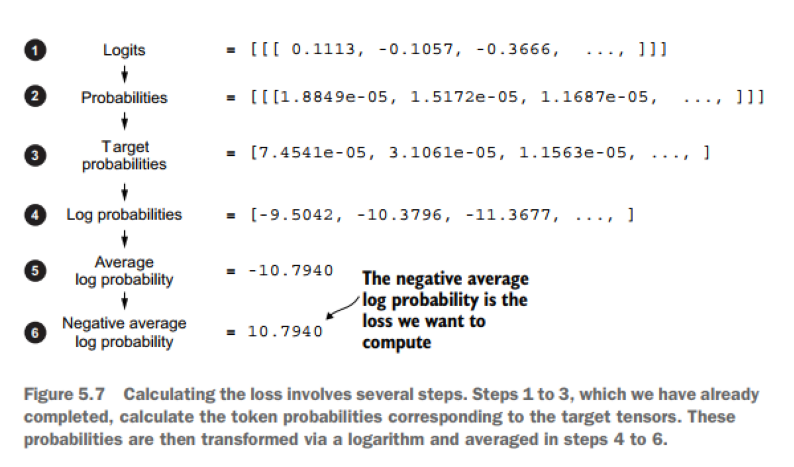

In [10]:
plt.figure(figsize=(10, 14))
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\loss.png')
plt.imshow(img)
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 14))
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\loss1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:
# Remember that figure 5.6 displays the softmax probabilities for a compact seventoken vocabulary to fit everything into a single figure.
# This implies that the starting random values will hover around 1/7, which equals approximately 0.14. However,
# the vocabulary we are using for our GPT-2 model has 50,257 tokens, so most of the initial
# probabilities will hover around 0.00002 (1/50,257).

In [12]:
inputs = torch.tensor([[16833, 3626, 6100], # ["every effort moves",
[40, 1107, 588]]) # "I really like"]

targets = torch.tensor([[3626, 6100, 345 ], # [" effort moves you",
[1107, 588, 11311]]) # " really like chocolate"]

In [13]:
with torch.no_grad():
    logits = model(inputs)
probas = torch.softmax(logits, dim=-1)
print(probas.shape)

torch.Size([2, 3, 50257])


In [14]:
token_ids = torch.argmax(probas, dim=-1, keepdim=True)
print("Token IDs:\n", token_ids)

Token IDs:
 tensor([[[16657],
         [  339],
         [42826]],

        [[49906],
         [29669],
         [41751]]])


In [15]:
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1:"
f" {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")

Targets batch 1:  effort moves you
Outputs batch 1:  Armed heNetflix


In [16]:
text_idx = 0
target_probas_1 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 1:", target_probas_1)
text_idx = 1
target_probas_2 = probas[text_idx, [0, 1, 2], targets[text_idx]]
print("Text 2:", target_probas_2)

Text 1: tensor([7.4541e-05, 3.1061e-05, 1.1563e-05])
Text 2: tensor([1.0337e-05, 5.6776e-05, 4.7559e-06])


In [17]:
log_probas = torch.log(torch.cat((target_probas_1, target_probas_2)))
print(log_probas)

tensor([ -9.5042, -10.3796, -11.3677, -11.4798,  -9.7764, -12.2561])


In [18]:
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor(-10.7940)


In [19]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.7940)


In [20]:
# At its core, the cross entropy loss is a popular measure in machine learning and deep
# learning that measures the difference between two probability distributions—typically,
# the true distribution of labels (here, tokens in a dataset) and the predicted distribution from a model (for instance, the token probabilities generated by an LLM).
# In the context of machine learning and specifically in frameworks like PyTorch, the
# cross_entropy function computes this measure for discrete outcomes, which is
# similar to the negative average log probability of the target tokens given the model’s
# generated token probabilities, making the terms “cross entropy” and “negative average log probability” related and often used interchangeably in practice.

In [21]:
print("Logits shape:", logits.shape)
print("Targets shape:", targets.shape)

Logits shape: torch.Size([2, 3, 50257])
Targets shape: torch.Size([2, 3])


In [22]:
logits_flat = logits.flatten(0, 1)
targets_flat = targets.flatten()
print("Flattened logits:", logits_flat.shape)
print("Flattened targets:", targets_flat.shape)

Flattened logits: torch.Size([6, 50257])
Flattened targets: torch.Size([6])


In [23]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)
print(loss)

tensor(10.7940)


#### Perplexity
##### Perplexity is a measure often used alongside cross entropy loss to evaluate the performance of models in tasks like language modeling. It can provide a more interpretable way to understand the uncertainty of a model in predicting the next token in a sequence.
##### Perplexity measures how well the probability distribution predicted by the model matches the actual distribution of the words in the dataset. Similar to the loss, a lower perplexity indicates that the model predictions are closer to the actual distribution.
##### Perplexity can be calculated as perplexity = torch.exp(loss), which returns tensor(48725.8203) when applied to the previously calculated loss. Perplexity is often considered more interpretable than the raw loss value because it signifies the effective vocabulary size about which the model is uncertain at each step. In the given example, this would translate to the model being unsure about which among 48,725 tokens in the vocabulary to generate as the next token.

In [24]:
file_path = "the-verdict.txt"
with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()

In [25]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))
print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 20479
Tokens: 5145


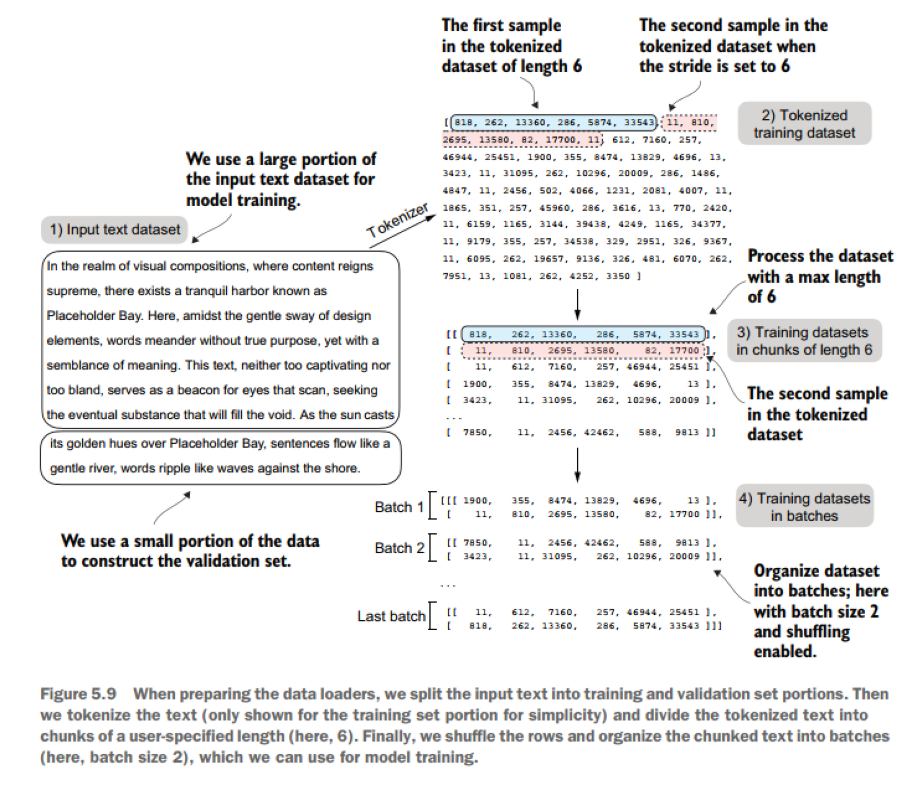

In [26]:
plt.figure(figsize=(12, 10))
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\schu.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [27]:
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]

In [28]:
class GPTDataset(torch.utils.data.Dataset):
    def __init__(self, txt, tokenizer, max_length, stride): 
        
        self.input_ids = []
        self.target_ids = []
        token_ids = tokenizer.encode(txt)
        
        for i in range(0, len(token_ids) - max_length, stride):
            
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
            
    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [29]:
def create_dataloader(text, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
    
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDataset(text, tokenizer, max_length, stride)

    dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )
    
    return dataloader

In [30]:
torch.manual_seed(123)
train_loader = create_dataloader(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [31]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])


In [32]:
def calc_loss_batch(input_batch, target_batch, model, device):
    
    input_batch = input_batch.to(device)
    target_batch = target_batch.to(device)
    logits = model(input_batch) # it calls forward function 
    loss = torch.nn.functional.cross_entropy(
        logits.flatten(0, 1), target_batch.flatten()
    )
    
    return loss

In [33]:
def calc_loss_loader(data_loader, model, device, num_batches=None):
    
    total_loss = 0.0
    
    if len(data_loader) == 0:
        return float("nan")
        
    elif num_batches is None:
        num_batches = len(data_loader) # Iteratives over all batches if no fixed num_batches is specified
        
    else:
        num_batches = min(num_batches, len(data_loader)) 
        # Reduces the number of batches to match the total number of batches in the data loader if num_batches exceeds the number of batches in the data loader
        
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(
                input_batch=input_batch,
                target_batch=target_batch,
                model=model,
                device=device
            )
            total_loss += loss.item() # Sums loss for each batch
        
        else:
            break
            
    return total_loss / num_batches

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
with torch.no_grad(): # Disables gradient tracking for efficiency because we are not training yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)
    
print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.987583690219456
Validation loss: 10.98110580444336


#### Training an LLM

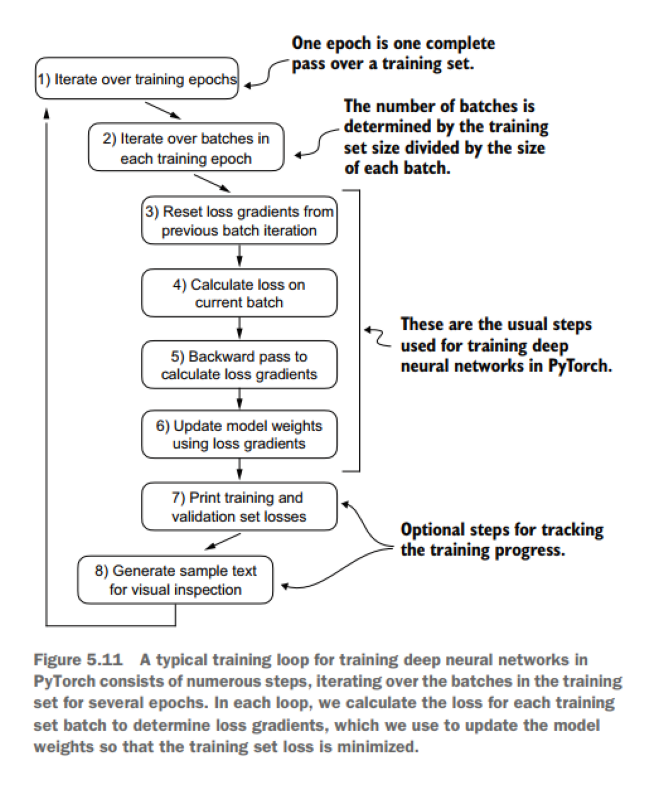

In [35]:
plt.figure(figsize=(12, 10))
img = mpimg.imread(r'C:\Users\yda2\Desktop\llms\train.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [43]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    
    model.eval()
    with torch.no_grad():
        
        train_loss = calc_loss_loader(
            train_loader, model, device, num_batches=eval_iter
        )
        val_loss = calc_loss_loader(
            val_loader, model, device, num_batches=eval_iter
        )
        
    model.train()
    return train_loss, val_loss

In [48]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    
    model.eval()
    context_size = model.position_embed.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model,
            idx=encoded,
            max_new_tokens=50,
            context_size=context_size
        )
        
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))   
    model.train()

In [49]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs, eval_freq, eval_iter, start_context, tokenizer):
    
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    for epoch in range(num_epochs):
        model.train() # sets the model to training mode. does not perform training by itself. Instead, it sets a flag that tells the model it's in training mode.
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()
            loss = calc_loss_batch(
                input_batch, target_batch, model, device
            )
            loss.backward()
            optimizer.step()
            tokens_seen += input_batch.numel()
            global_step += 1

            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter
                )
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(
                    f"Ep {epoch+1} (Step {global_step:06d}): "
                    f"Train loss {train_loss:.3f}, "
                    f"Val loss {val_loss:.3f}"
                )
                
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )
        
    return train_losses, val_losses, track_tokens_seen

### AdamW
##### Adam optimizers are a popular choice for training deep neural networks. However, in our training loop, we opt for the AdamW optimizer. AdamW is a variant of Adam that improves the weight decay approach, which aims to minimize model complexity and prevent overfitting by penalizing larger weights. This adjustment allows AdamW to achieve more effective regularization and better generalization; thus, AdamW is frequently used in the training of LLMs.

In [50]:
torch.manual_seed(123)
model = GPT2Model(
    vocab_size=GPT_CONFIG_124M['vocab_size'],
    embed_dim=GPT_CONFIG_124M['emb_dim'],
    context_length=GPT_CONFIG_124M['context_length'],
    dropout_rate=GPT_CONFIG_124M['drop_rate'],
    num_layer=GPT_CONFIG_124M['n_layers'],
    num_heads=GPT_CONFIG_124M['n_heads'],
    qkv_bias=GPT_CONFIG_124M['qkv_bias']
)
model.to(device)
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=0.0004,
    weight_decay=0.1
)

num_epochs = 10

train_losses, val_losses, tokens_seen = train_model_simple(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    device=device,
    num_epochs=num_epochs,
    eval_freq=5,
    eval_iter=5,
    start_context="Every effort moves you",
    tokenizer=tokenizer
)

Ep 1 (Step 000000): Train loss 9.783, Val loss 9.927
Ep 1 (Step 000005): Train loss 7.985, Val loss 8.335
Every effort moves you,,,,,,,,,,,,.                                     
Ep 2 (Step 000010): Train loss 6.753, Val loss 7.048
Ep 2 (Step 000015): Train loss 6.114, Val loss 6.573
Every effort moves you, and,, and, and,,,,, and, and,,,,,,,,,,,,,, and,,,, and,, and,,,,, and,,,,,,
Ep 3 (Step 000020): Train loss 5.525, Val loss 6.490
Ep 3 (Step 000025): Train loss 5.324, Val loss 6.387
Every effort moves you, and to the picture.                      "I, and the of the of the's the honour, and, and I had been, and I
Ep 4 (Step 000030): Train loss 4.761, Val loss 6.360
Ep 4 (Step 000035): Train loss 4.461, Val loss 6.258
Every effort moves you of the to the picture--as of the picture--as I had been " it was his " I was the     "I was his I had been the his pictures--and it the picture and I had been the picture of
Ep 5 (Step 000040): Train loss 3.833, Val loss 6.196
Every effort moves yo

In [52]:
def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    
    fig, ax1 = plt.subplots(figsize=(5, 3))
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(
        epochs_seen, val_losses, linestyle="-.", label="Validation loss"
    )
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2 = ax1.twiny()
    ax2.plot(tokens_seen, train_losses, alpha=0)
    ax2.set_xlabel("Tokens seen")
    fig.tight_layout()
    plt.show()

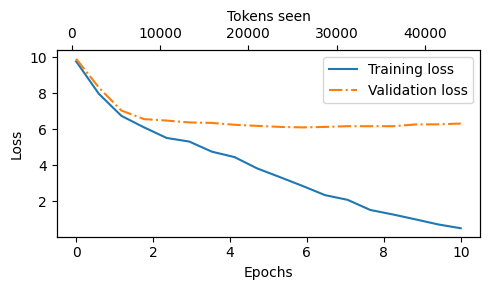

In [53]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

In [54]:
# The resulting training and validation loss plot is shown in figure 5.12. As we can see,
# both the training and validation losses start to improve for the first epoch. However,
# the losses start to diverge past the second epoch. This divergence and the fact that the
# validation loss is much larger than the training loss indicate that the model is overfitting to the training data.
# We can confirm that the model memorizes the training data
# verbatim by searching for the generated text snippets, such as quite insensible to
# the irony in the “The Verdict” text file.

In [55]:
# This memorization is expected since we are working with a very, very small training
# dataset and training the model for multiple epochs. Usually, it’s common to train a
# model on a much larger dataset for only one epoch.